Question/Goal: Is there a relationship between anxiety and the motivation for gaming?
For example: 
- Do people that typically play games to win have more anxiety and why? If they do have more anxiety, it would be worth looking into their lifestyle and whether they play games for income
- Do people that play for fun have less anxiety? If so, it would be worth looking into whether games acting as a destressor lessen anxiety, or maybe those with less anxiety have the capacity to play games for fun instead. Could also look into if people with anxiety can benefit from playing games to decompress. 

- ashley goals : sep gaming motivation
- to do list: add titles to graphs and add analysis :D

In [125]:
#import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy.stats as st
from scipy.stats import linregress
from scipy import stats
import random


In [126]:
#reference file path
data = Path("../data_cleanup/Gaming.csv")

#import data into dataframe
oggame_df = pd.read_csv(data, encoding="UTF-8")

oggame_df.head()

,Unnamed: 0,Entry,Gender,Age,Residence,Birthplace,Work,Degree,Game,Hours per Week,...,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,SPIN Total
0,0,1,Male,25,USA,USA,Unemployed / between jobs,Bachelor (or equivalent),Skyrim,15,...,0,0,0,0,0,1,0,1,0,5
1,1,2,Male,41,USA,USA,Unemployed / between jobs,Bachelor (or equivalent),Other,8,...,4,0,3,0,1,3,3,1,2,33
2,2,3,Female,32,DEU,DEU,Employed,Bachelor (or equivalent),Other,0,...,0,1,1,3,0,2,4,4,2,31
3,3,4,Male,28,USA,USA,Employed,Bachelor (or equivalent),Other,20,...,0,0,1,3,0,0,1,0,0,11
4,4,5,Male,19,KOR,USA,Employed,High school diploma (or equivalent),Other,20,...,2,0,1,0,0,0,0,3,0,13


In [127]:
#check columns for dropping
oggame_df.columns

Index(['Unnamed: 0', 'Entry', 'Gender', 'Age', 'Residence', 'Birthplace',
       'Work', 'Degree', 'Game', 'Hours per Week', 'Gaming Motivation',
       'Playstyle', 'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7',
       'GAD Total', 'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5', 'SWL Total',
       'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8',
       'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15',
       'SPIN16', 'SPIN17', 'SPIN Total'],
      dtype='object')

In [128]:
#drop unused columns
dropoggame_df = oggame_df.drop(columns= ['Unnamed: 0', 'Gender', 'Age', 'Residence', 'Birthplace',
       'Work', 'Degree', 'Game', 'Hours per Week', 'Playstyle', 'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5', 'SWL Total',
       'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8',
       'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15',
       'SPIN16', 'SPIN17', 'SPIN Total'])

dropoggame_df

,Entry,Gaming Motivation,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GAD Total
0,1,having fun,0,0,0,0,1,0,0,1
1,2,having fun,1,2,2,2,0,1,0,8
2,3,having fun,0,2,2,0,0,3,1,8
3,4,improving,0,0,0,0,0,0,0,0
4,5,having fun,2,1,2,2,2,3,2,14
...,...,...,...,...,...,...,...,...,...,...
11133,14246,improving,1,0,0,1,0,1,1,4
11134,14247,winning,3,3,3,3,2,3,3,20
11135,14248,having fun,0,0,0,0,0,0,0,0
11136,14249,having fun,3,2,1,3,0,1,3,13


In [129]:
#looking at all dataframe responses
all_gm_responses = dropoggame_df['Gaming Motivation'].unique()
all_gm_responses

array(['having fun', 'improving', 'relaxing', 'winning',
       'improving, having fun', 'All',
       "I play it as I watch TV or movies.  I've gone through many a Netflix binge with Isaac.",
       'all of the above', 'passing the time', 'having fun and improving',
       'Forgetting troubles', 'All of them', 'Being with friends',
       'getting good loot', 'have fun and win', 'Wasting time',
       'talking to irl friends', 'improving while having fun',
       'All of the above!', 'socializing', 'all above', 'playing well',
       'the three last: improving, relaxing and having fun',
       'winning and improving',
       'depends, wwinning in rankeds, fun and relaxing in normal / aram',
       'winning whilst improving', 'Relaxing & having fun',
       'improving & having fun', 'All of the above.', 'All of the above',
       'winning because if i lose while boosting i wont get money ',
       'passing time', 'not thinking about my clinic depression.',
       'all answers mentioned

In [130]:
#making all responses lowercase for uniformity and easier filtering
dropoggame_df['Gaming Motivation'] = dropoggame_df['Gaming Motivation'].str.lower()

In [131]:
#looking at all gaming motivation responses for cleanup + their counts
all_gm_response_counts = dropoggame_df['Gaming Motivation'].value_counts()
all_gm_response_counts

Gaming Motivation
having fun                                                                          4479
improving                                                                           4019
winning                                                                             1699
relaxing                                                                             566
all of the above                                                                      36
                                                                                    ... 
competitive play, improving but in games that are winnable                             1
winning and having fun, i'm a sporty person so i'm competitive.                        1
winning improving relaxing having fun                                                  1
getting to the top of the boards                                                       1
mental priority is fun>improve>win, actual priority once in game win>improve>fun       1
Nam

In [132]:
#filtering dataframe 'Gaming Motivation' based on whether the string includes one of the words in keep_words
keep_words = ['win', 'improv', 'fun', 'relax', 'all', 'comb', 'mix']
filter_df = dropoggame_df[dropoggame_df['Gaming Motivation'].str.contains('|'.join(keep_words))]
filter_df

,Entry,Gaming Motivation,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GAD Total
0,1,having fun,0,0,0,0,1,0,0,1
1,2,having fun,1,2,2,2,0,1,0,8
2,3,having fun,0,2,2,0,0,3,1,8
3,4,improving,0,0,0,0,0,0,0,0
4,5,having fun,2,1,2,2,2,3,2,14
...,...,...,...,...,...,...,...,...,...,...
11133,14246,improving,1,0,0,1,0,1,1,4
11134,14247,winning,3,3,3,3,2,3,3,20
11135,14248,having fun,0,0,0,0,0,0,0,0
11136,14249,having fun,3,2,1,3,0,1,3,13


In [133]:
#checking filtered dataframe's unique responses
filter_gm_response = filter_df['Gaming Motivation'].unique()
filter_gm_response

array(['having fun', 'improving', 'relaxing', 'winning',
       'improving, having fun', 'all', 'all of the above',
       'having fun and improving', 'all of them', 'have fun and win',
       'improving while having fun', 'all of the above!', 'all above',
       'the three last: improving, relaxing and having fun',
       'winning and improving',
       'depends, wwinning in rankeds, fun and relaxing in normal / aram',
       'winning whilst improving', 'relaxing & having fun',
       'improving & having fun', 'all of the above.',
       'winning because if i lose while boosting i wont get money ',
       'all answers mentioned', 'all of the above ',
       'winning is the most fun but i sometimes still have fun if i loose',
       'conpeting, the fun that comes with it', 'all of these 4',
       'relaxing+having fun', 'improving and having fun',
       "winning and improving, it's stoped being about fun a long time ago, but fun is still there",
       'equally value winning and havin

In [134]:
#checking filter_gm responses and getting value counts
filter_gm_response = filter_df['Gaming Motivation'].value_counts()
filter_gm_response

Gaming Motivation
having fun                                                                          4479
improving                                                                           4019
winning                                                                             1699
relaxing                                                                             566
all of the above                                                                      36
                                                                                    ... 
having fun and improving 50/50                                                         1
having fun with friends                                                                1
improving, relaxing, and having fun.                                                   1
combination of having fun, relaxing and improving                                      1
mental priority is fun>improve>win, actual priority once in game win>improve>fun       1
Nam

In [135]:
#creating main gaming motivation dataframe with only four responses (winning, improving, having fun, relaxing)
#making df copy and listing words to keep for filtering
simple_copy = filter_df.copy()
filtering_words = ['win','improv','fun','relax']

#filtering df to include rows with only one of the specific words and not any others
simple_filter_df = simple_copy[simple_copy['Gaming Motivation'].apply(
    lambda x: sum(1 for word in filtering_words if f'{word}' in f'{x}') == 1)]

#display filtered df
simple_filter_df

,Entry,Gaming Motivation,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GAD Total
0,1,having fun,0,0,0,0,1,0,0,1
1,2,having fun,1,2,2,2,0,1,0,8
2,3,having fun,0,2,2,0,0,3,1,8
3,4,improving,0,0,0,0,0,0,0,0
4,5,having fun,2,1,2,2,2,3,2,14
...,...,...,...,...,...,...,...,...,...,...
11133,14246,improving,1,0,0,1,0,1,1,4
11134,14247,winning,3,3,3,3,2,3,3,20
11135,14248,having fun,0,0,0,0,0,0,0,0
11136,14249,having fun,3,2,1,3,0,1,3,13


In [136]:
#checking simple_filter responses and getting value counts
simple_filter_responses = simple_filter_df['Gaming Motivation'].value_counts()
simple_filter_responses

Gaming Motivation
having fun                                                                                                                                                                                          4479
improving                                                                                                                                                                                           4019
winning                                                                                                                                                                                             1699
relaxing                                                                                                                                                                                             566
having fun together with friends                                                                                                                                                  

In [137]:
#replacing longer responses with simpler responses
replace_dict = {
        "not losing my time and improve": "improving",
        "having fun together with friends": "having fun",
        "having fun by spending time with my friends :d": "having fun",
        "if it's not fun, i won't do it, however i want to get good at league because it can be challenging to get good at, it's something to work on in life and it's extremely fun so why the fuck not!": "having fun",
        "having fun by giving it your best shot.": "having fun",
        "having fun with friends": "having fun",
        "conpeting, the fun that comes with it": "having fun",
        "winning with friends, winning while alone is almost depressing.": "winning",
        "playing with friends and winning with them as a team": "winning",
        "winning and having interesting plays": "winning",
        "individual performance and winning together": "winning",
        "it just works as a distraction. other then that winning and climbing that ladder": "winning",
        "winning because if i lose while boosting i wont get money": "winning"
    
}
simple_copy_df = simple_filter_df.copy()
simple_copy_df.replace(replace_dict, inplace=True, regex=True)
simple_copy_df

,Entry,Gaming Motivation,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GAD Total
0,1,having fun,0,0,0,0,1,0,0,1
1,2,having fun,1,2,2,2,0,1,0,8
2,3,having fun,0,2,2,0,0,3,1,8
3,4,improving,0,0,0,0,0,0,0,0
4,5,having fun,2,1,2,2,2,3,2,14
...,...,...,...,...,...,...,...,...,...,...
11133,14246,improving,1,0,0,1,0,1,1,4
11134,14247,winning,3,3,3,3,2,3,3,20
11135,14248,having fun,0,0,0,0,0,0,0,0
11136,14249,having fun,3,2,1,3,0,1,3,13


In [138]:
#checking simple_filter responses and getting value counts
simple_filter_responses = simple_copy_df['Gaming Motivation'].value_counts()
simple_filter_responses

Gaming Motivation
having fun                                                 4485
improving                                                  4020
winning                                                    1704
relaxing                                                    566
winning                                                       1
all of the above minus relaxing                               1
all of those, but i guess everyone wants to win...            1
i have fun when i see myself getting better at the game       1
all of the above with an emphasis on winning.                 1
improvement and enjoyment                                     1
getting better so i can win more                              1
Name: count, dtype: int64

In [139]:
#drop mixed responses from simple_copy_df
#list of responses to keep
keep_resp = ["having fun", "improving", "winning", "relaxing"]

#copy of df 
simcopy_df = simple_copy_df.copy()

#keeping only keep_resp in dataframe
simpler_copy_df = simcopy_df[simcopy_df['Gaming Motivation'].isin(keep_resp)]

#checking counts for each response
simpler_copy_df['Gaming Motivation'].value_counts()

Gaming Motivation
having fun    4485
improving     4020
winning       1704
relaxing       566
Name: count, dtype: int64

In [140]:
#creating df with 'all' responses
#creating all and mixed gaming motivation dataframe 
mix_copy = filter_df.copy()
mix_ans = ['win','improv','fun', 'relax', 'all', 'mix', 'comb']

#filter rows with two or more words from mix_ans
mix_filter_df = mix_copy[mix_copy['Gaming Motivation'].apply(lambda x: ('all ' in x) or (sum(word in x for word in mix_ans) >= 2))]


mix_filter_df


,Entry,Gaming Motivation,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GAD Total
16,18,"improving, having fun",0,0,0,0,0,0,1,1
154,185,all of the above,3,3,3,1,1,0,0,11
230,281,having fun and improving,0,0,0,0,0,0,0,0
275,336,all of them,0,0,0,0,0,0,0,0
327,413,have fun and win,0,0,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...
10982,14052,winning and improving - equally,0,0,0,1,0,0,0,1
11004,14079,"winning and improving, i have fun when succeed...",1,1,1,0,1,2,1,7
11006,14081,improving and having fun,1,1,0,0,0,1,0,3
11031,14119,"improving and having fun, while trying to not ...",0,0,0,0,0,0,0,0


In [141]:
#checking mix_filter responses
mix_filter_responses = mix_filter_df['Gaming Motivation'].unique()
mix_filter_responses

array(['improving, having fun', 'all of the above',
       'having fun and improving', 'all of them', 'have fun and win',
       'improving while having fun', 'all of the above!', 'all above',
       'the three last: improving, relaxing and having fun',
       'winning and improving',
       'depends, wwinning in rankeds, fun and relaxing in normal / aram',
       'winning whilst improving', 'relaxing & having fun',
       'improving & having fun', 'all of the above.',
       'all answers mentioned', 'all of the above ',
       'winning is the most fun but i sometimes still have fun if i loose',
       'all of these 4', 'relaxing+having fun',
       'improving and having fun',
       "winning and improving, it's stoped being about fun a long time ago, but fun is still there",
       'equally value winning and having fun',
       'all of the above minus relaxing',
       'combination of all above, mostly improving and winning',
       'both, improving and having fun', 'having fun while 

In [142]:
#checking mix_filter responses and their counts
mix_filter_responses = mix_filter_df['Gaming Motivation'].value_counts()
mix_filter_responses

Gaming Motivation
all of the above                                                                    36
improving and having fun                                                            15
having fun and improving                                                             7
winning and improving                                                                7
winning while having fun                                                             3
                                                                                    ..
winning/having fun                                                                   1
having fun and improving 50/50                                                       1
improving, relaxing, and having fun.                                                 1
combination of having fun, relaxing and improving                                    1
mental priority is fun>improve>win, actual priority once in game win>improve>fun     1
Name: count, Length: 167,

In [143]:
#replacing all mixed filter responses with "mixed response"
mix_copy_df = mix_filter_df.copy()
mix_copy_df['Gaming Motivation'] = 'mixed response'
#checking counts for mixed response
mix_copy_df['Gaming Motivation'].value_counts()

Gaming Motivation
mixed response    244
Name: count, dtype: int64

In [144]:
#concat mix_copy_df and simple_copy_df together
concat_GADgm = pd.concat([simpler_copy_df, mix_copy_df])
#checking counts for each response
concat_GADgm['Gaming Motivation'].value_counts()

Gaming Motivation
having fun        4485
improving         4020
winning           1704
relaxing           566
mixed response     244
Name: count, dtype: int64

In [145]:
#sorting GADgm by Entry number
sorted_GADgm = concat_GADgm.sort_values(by= 'Entry')

#capitalizing/renaming responses in Gaming Motivation
rename ={
    'having fun': 'Having Fun',
    'relaxing': 'Relaxing',
    'improving': 'Improving',
    'winning': 'Winning',
    'mixed response': 'Mixed Response'

}
GADgm_df = sorted_GADgm.copy()
GADgm_df.replace(rename, inplace=True, regex=True)
GADgm_df

,Entry,Gaming Motivation,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GAD Total
0,1,Having Fun,0,0,0,0,1,0,0,1
1,2,Having Fun,1,2,2,2,0,1,0,8
2,3,Having Fun,0,2,2,0,0,3,1,8
3,4,Improving,0,0,0,0,0,0,0,0
4,5,Having Fun,2,1,2,2,2,3,2,14
...,...,...,...,...,...,...,...,...,...,...
11133,14246,Improving,1,0,0,1,0,1,1,4
11134,14247,Winning,3,3,3,3,2,3,3,20
11135,14248,Having Fun,0,0,0,0,0,0,0,0
11136,14249,Having Fun,3,2,1,3,0,1,3,13


In [146]:
#checking GADgm responses
GADgm_responses = GADgm_df['Gaming Motivation'].value_counts()
GADgm_responses

Gaming Motivation
Having Fun        4485
Improving         4020
Winning           1704
Relaxing           566
Mixed Response     244
Name: count, dtype: int64

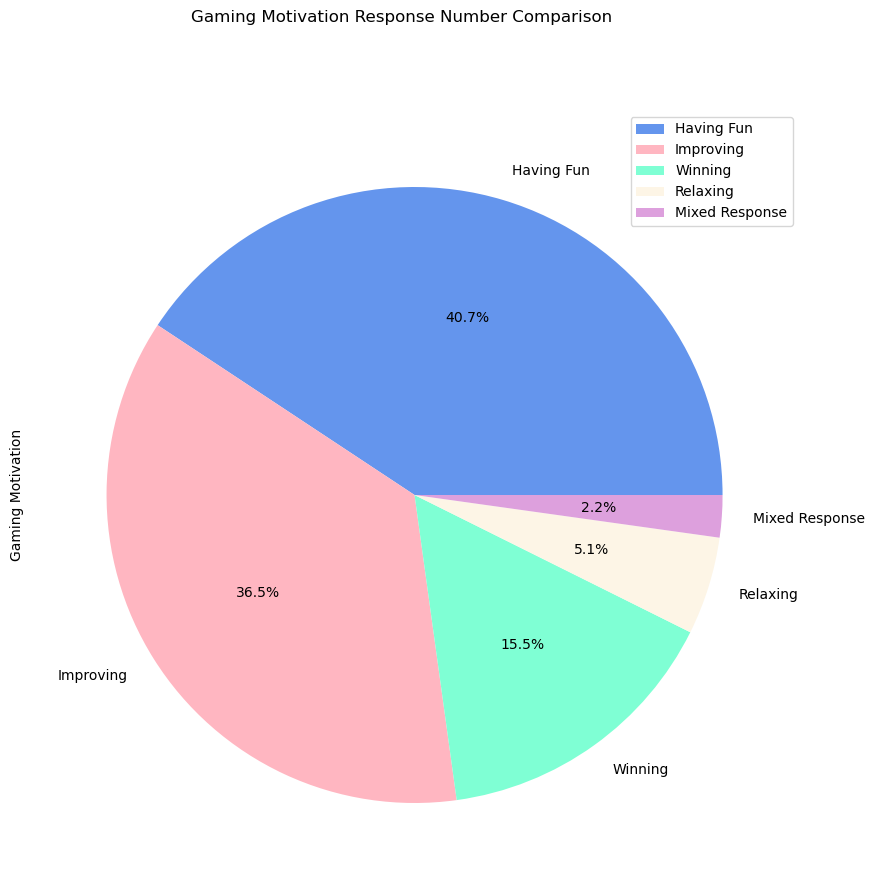

In [147]:
#creating pie chart or bar graph of all responses used for question
resp_pie = GADgm_df["Gaming Motivation"].value_counts()
resp_pie_df = pd.DataFrame(resp_pie)
resp_pie_df.plot(kind="pie", 
    figsize=(10,10),
    autopct = "%1.1f%%", 
    title= "Gaming Motivation Response Number Comparison", 
    subplots = True, 
    ylabel = "Gaming Motivation", 
    colors = ["cornflowerblue", "lightpink", "aquamarine", "oldlace", "plum"])
plt.legend(loc="best", fontsize = "medium")
plt.tight_layout;

In [148]:
GADgm_df.dtypes

Entry                 int64
Gaming Motivation    object
GAD1                  int64
GAD2                  int64
GAD3                  int64
GAD4                  int64
GAD5                  int64
GAD6                  int64
GAD7                  int64
GAD Total             int64
dtype: object

The gaming motive 'Having Fun' has 105 potential outlier(s) out of 4485 responses.
The gaming motive 'Relaxing' has 10 potential outlier(s) out of 566 responses.
The gaming motive 'Improving' has 208 potential outlier(s) out of 4020 responses.
The gaming motive 'Winning' has 31 potential outlier(s) out of 1704 responses.
The gaming motive 'Mixed Response' has 7 potential outlier(s) out of 244 responses.


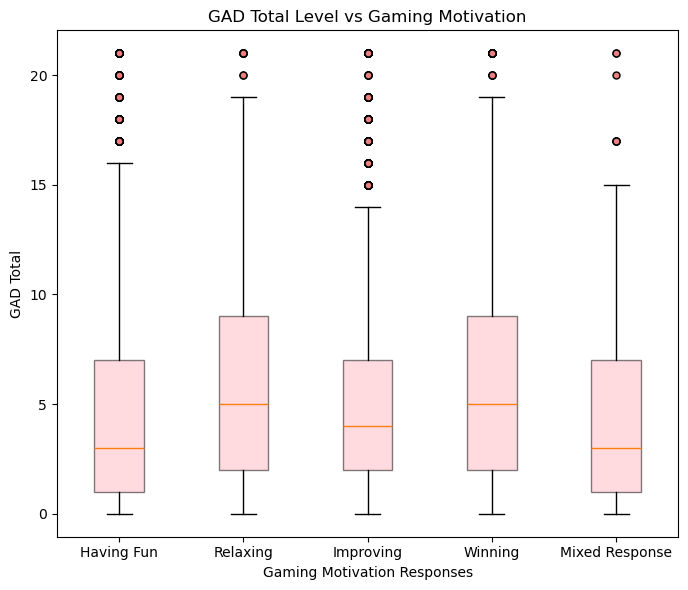

In [149]:
#creating boxplot for anxiety and gaming motivation
#list for for loop (and later for plot labels)
gaming_motive = ["Having Fun", "Relaxing", "Improving", "Winning", "Mixed Response"]
#creating new dataframe for data plotting with lists
entry_list = GADgm_df['Entry'].tolist()
gm_list = GADgm_df['Gaming Motivation'].tolist()
GADtotal_list = GADgm_df['GAD Total'].tolist()

plot_data_df = {
     'Entry' : entry_list,
     'Gaming Motivation' : gm_list,
     'GAD Total' : GADtotal_list
}

plot_data_df = pd.DataFrame(plot_data_df)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for motive in gaming_motive:
    quartiles = plot_data_df.loc[plot_data_df['Gaming Motivation'] == motive, 'GAD Total'].quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    box_data = plot_data_df.loc[plot_data_df['Gaming Motivation'] == motive, 'GAD Total']
    outliers = box_data[(box_data < lower_bound) | (box_data > upper_bound)]

    #printing number of outliers and total responses for each gaming motivation
    print(f"The gaming motive '{motive}' has {outliers.count()} potential outlier(s) out of {len(box_data)} responses.")

#creating box plot for GAD Total vs Gaming Motivation
#setting figure size
fig, ax = plt.subplots(figsize=(7,6))

#setting box plot positions 
positions = range(1, len(gaming_motive) +1)

#plotting box plots for each gaming motive based on GAD Total
for i, motive in enumerate(gaming_motive):
    motive_data = plot_data_df[plot_data_df['Gaming Motivation'] == motive]['GAD Total']
    
    #formatting boxplots
    boxplot = ax.boxplot(motive_data,
                         positions=[positions[i]],
                         widths=0.4,
                         patch_artist=True,
                         boxprops=dict(facecolor='lightpink', alpha=0.5),
                         flierprops=dict(marker='o', markerfacecolor='lightcoral', markersize=5))

#extra formatting for boxplots
ax.set_xticks(positions)
ax.set_xticklabels(gaming_motive)
ax.set_title('GAD Total Level vs Gaming Motivation')
ax.set_ylabel('GAD Total')
ax.set_xlabel('Gaming Motivation Responses')


plt.tight_layout()


The t-Statistic for Having Fun vs. Winning:, -2.7228738880045733
The p-Value for Having Fun vs. Winning:, 0.006714915223077264
The confidence interval for Having Fun vs. Winning:, (-1.758012981518576, -1.2018391076047918)


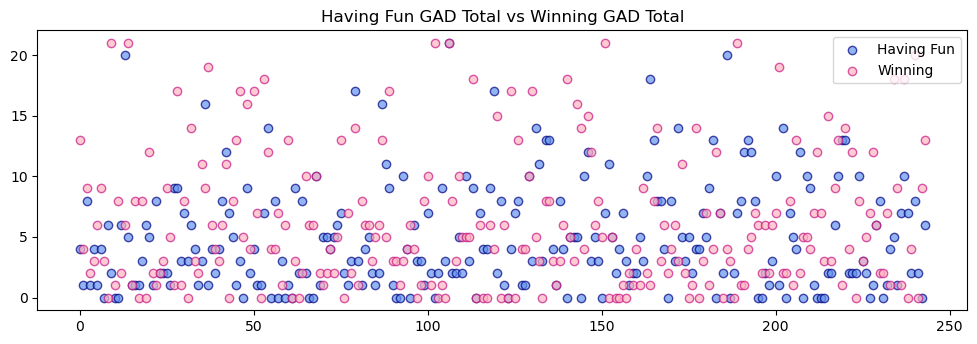

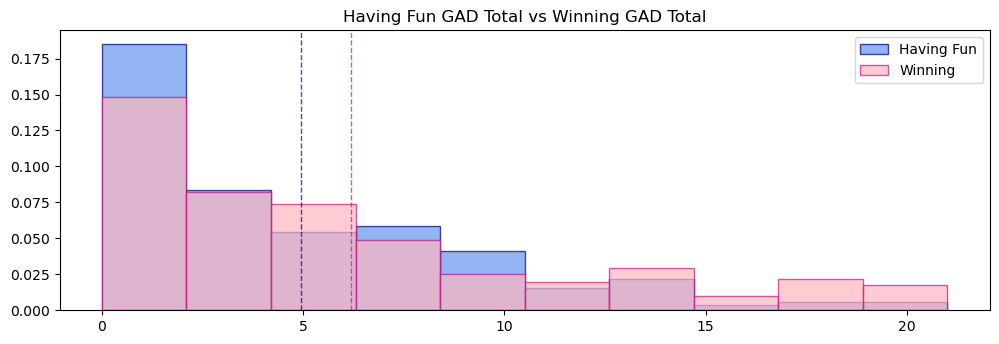

In [160]:
#creating independent t tests between different gaming motives and their GAD Totals
#creating separate populations for each gaming motive
fun_pop = []
improve_pop = []
relax_pop = []
win_pop = []
mix_pop = []

for index, row in plot_data_df.iterrows():
    if row['Gaming Motivation'] == 'Having Fun':
        fun_pop.append(row['GAD Total'])
    elif row['Gaming Motivation'] == 'Improving':
        improve_pop.append(row['GAD Total'])
    elif row['Gaming Motivation'] == 'Relaxing':
        relax_pop.append(row['GAD Total'])
    elif row['Gaming Motivation'] == 'Winning':
        win_pop.append(row['GAD Total'])
    elif row['Gaming Motivation'] == 'Mixed Response':
        mix_pop.append(row['GAD Total'])


#creating definition for creating independent-T test 
def ttestdata(pop1, pop2, label1, label2):
    #getting random sample from the previous populations
    sample_size = 244
    sample_pop1 = random.sample(pop1, sample_size)
    sample_pop2 = random.sample(pop2, sample_size)

    #making scatter plot of data
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(sample_pop1)), sample_pop1, label= label1, marker="o", color= 'cornflowerblue', edgecolor='navy', alpha = 0.7)
    plt.scatter(range(len(sample_pop2)), sample_pop2, label= label2, marker="o", color= 'lightpink', edgecolor='mediumvioletred', alpha = 0.7)
    plt.legend(loc = 'best')
    plt.title(f"{label1} GAD Total vs {label2} GAD Total")

    #making histogram of data
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 2)
    plt.hist(sample_pop1, 10, density=True, alpha=0.7, label= label1, color = 'cornflowerblue', edgecolor='navy')
    plt.hist(sample_pop2, 10, density=True, alpha=0.7, label= label2, color = 'lightpink', edgecolor='mediumvioletred')
    plt.axvline(np.mean(sample_pop1), color='navy', linestyle='dashed', linewidth=1, alpha = 0.7)
    plt.axvline(np.mean(sample_pop2), color='mediumvioletred', linestyle='dashed', linewidth=1, alpha = 0.7)
    plt.legend(loc= 'best')
    plt.title(f"{label1} GAD Total vs {label2} GAD Total")
    plt.tight_layout

    #finding confidence intervals, t-statistic, and p-value
    t_statistic, p_value = stats.ttest_ind(sample_pop1, sample_pop2, equal_var=False)
    mean_diff = np.mean(pop1) - np.mean(pop2)
    std_err = np.sqrt(np.var(pop1)/len(pop1) + np.var(pop2)/len(pop2))
    margin_of_error = stats.t.ppf(0.975, len(pop1) + len(pop2) - 2) * std_err
    confidence_interval = (mean_diff - margin_of_error, mean_diff + margin_of_error)

    print(f"The t-statistic for {label1} vs. {label2}:, {t_statistic}")
    print(f"The p-value for {label1} vs. {label2}:, {p_value}")
    print(f"The confidence interval for {label1} vs. {label2}:, {confidence_interval}")


ttestdata(fun_pop, win_pop, "Having Fun", "Winning")

The t-Statistic for Improving vs. Relaxing:, -2.7526218338216055
The p-Value for Improving vs. Relaxing:, 0.006133799973185809
The confidence interval for Improving vs. Relaxing:, (-1.5219417790278043, -0.640366819323196)


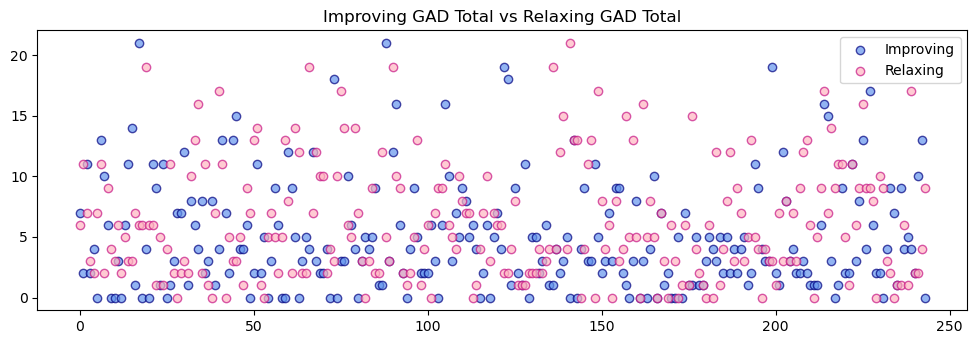

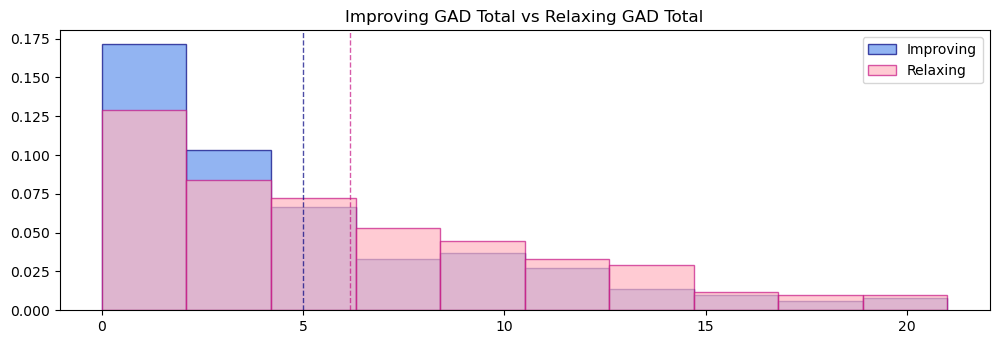

In [161]:
ttestdata(improve_pop, relax_pop, "Improving", "Relaxing")

The t-Statistic for Improving vs. Having Fun:, 0.6374383399586819
The p-Value for Improving vs. Having Fun:, 0.5241398199971785
The confidence interval for Improving vs. Having Fun:, (0.46197029555424807, 0.8448301503766326)


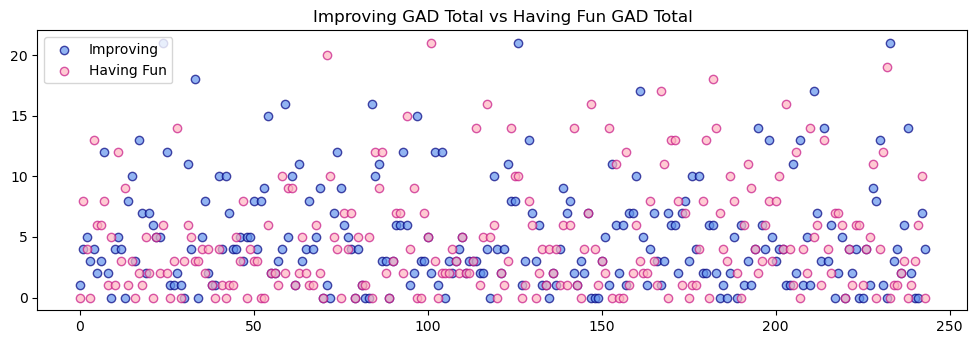

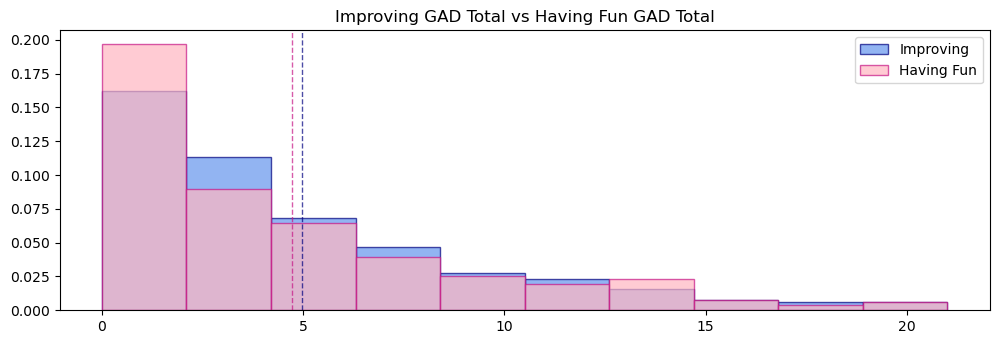

In [162]:
ttestdata(improve_pop, fun_pop, "Improving", "Having Fun")

The t-Statistic for Improving vs. Relaxing:, -1.9148904951229706
The p-Value for Improving vs. Relaxing:, 0.0560937539162178
The confidence interval for Improving vs. Relaxing:, (-1.5219417790278043, -0.640366819323196)


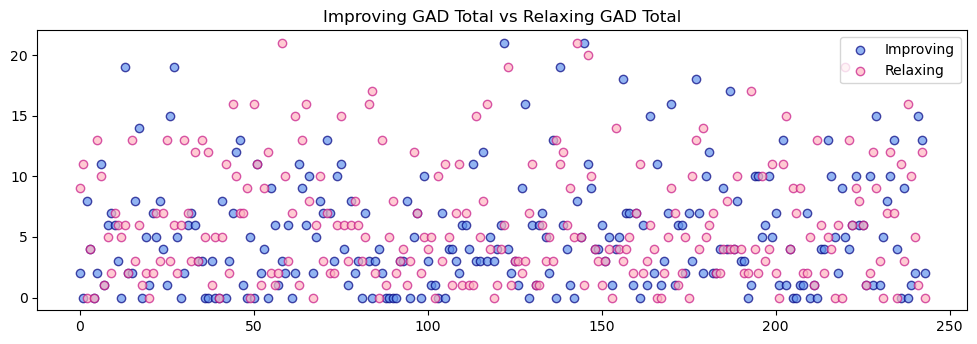

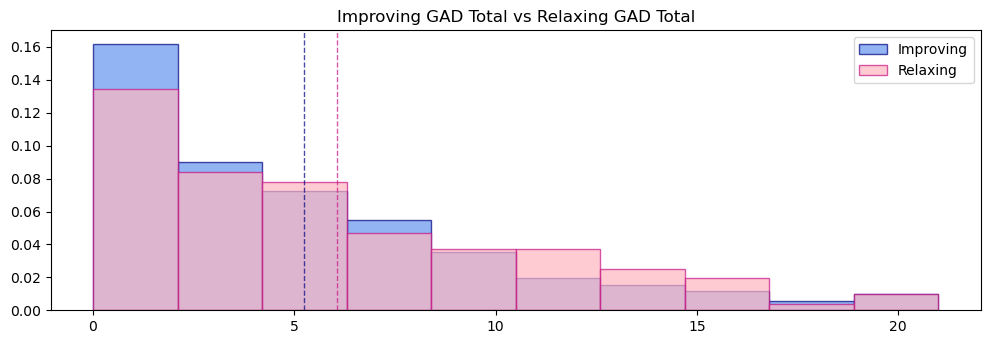

In [163]:
ttestdata(improve_pop, relax_pop, "Improving", "Relaxing")